<IPython.core.display.Javascript object>


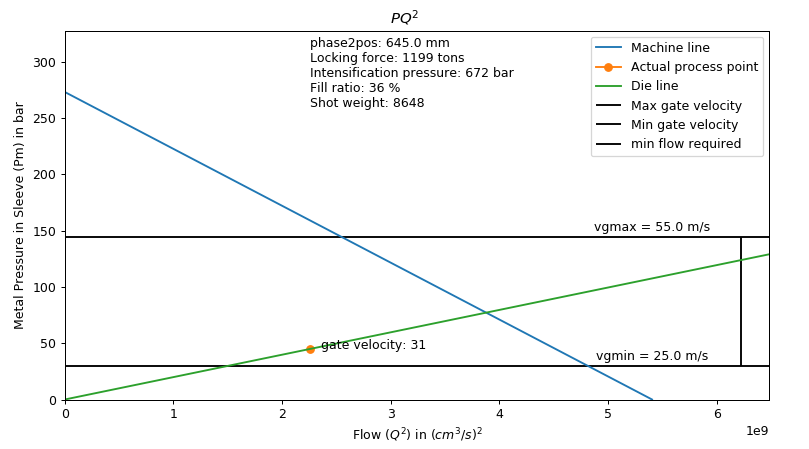

Output()

In [3]:
#nbi:hide_in
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import *
%matplotlib nbagg

fig,ax= plt.subplots(1,figsize=(9,5))

layout=widgets.Layout(description_width='50px',width='300px',margin='0 0 0 0',padding='0 0 0 0')
style=widgets.Style(description_width='initial')
phs=FloatSlider(min=0,max=200,value=120,description='$N_2$',layout=layout)
Dint=FloatSlider(min=0,max=500,value=284,description='Dint',layout=layout)
Dinj=FloatSlider(min=0,max=300,value=181,description='Dinj',layout=layout)
Dpl=FloatSlider(min=0,max=200,value=120,description='Dpl',layout=layout)
Ag=FloatSlider(min=0,max=50,value=15.5,description='Ag',layout=layout)
vpl=FloatSlider(min=0,max=10,value=4.2,description='vpl',layout=layout)
Ti=FloatSlider(min=500,max=800,value=630,description='Ti',layout=layout)
Tf=FloatSlider(min=500,max=800,value=582,description='Tf',layout=layout)
Td=FloatSlider(min=50,max=400,value=180,description='Td',layout=layout)
S=FloatSlider(min=0,max=100,value=20,description='S',layout=layout)
tw=FloatSlider(min=0,max=10,value=4,description='tw',layout=layout)
dl=FloatSlider(min=0,max=3,value=2.39,description='dl',layout=layout)
Cd=FloatSlider(min=0,max=1,value=0.5,description='Cd',layout=layout)
vgmax=FloatSlider(min=0,max=100,value=55,description='vgmax',layout=layout)
vgmin=FloatSlider(min=0,max=100,value=25,description='vgmin',layout=layout)
Wp=FloatSlider(min=0,max=30000,value=5040,description='Wp',layout=layout)
Wof=FloatSlider(min=0,max=10000,value=688,description='Wof',layout=layout)
Wrun=FloatSlider(min=0,max=20000,value=2920,description='Wrun',layout=layout)
Aproj=FloatSlider(min=0,max=5000,value=1750,description='Aproj',layout=layout)
Ls=FloatSlider(min=0,max=200,value=89.2,description='Ls',layout=layout)
vdry=FloatSlider(min=0,max=10,value=6.5,description='vdry',layout=layout)
tb=FloatSlider(min=0,max=10,value=3.5,description='tb',layout=layout)
Tliq=IntSlider(min=550,max=600,value=582,description='Liquidus temperature ($^{\circ}$C)',
               layout=layout)
Tsol=IntSlider(min=500,max=550,value=516,description='Solidus temperature ($^{\circ}$C)',
               layout =layout)
gt=Text(description='Part name',layout=layout)
def calc_1(phs,Dint,Dinj,Dpl,Ag,vpl,vdry,Ti,Tf,Td,S,tw,dl,Cd,tb,vgmax,vgmin,Wp,Wof,Wrun,Aproj,Ls,gt,Tliq,Tsol):
    rho=dl*1000.0 # Density of Liqid Aluminium in Kg/m^3
    cp=0.9625*1000 # Specific heat of Aluminium in J/kg deg K
    Lf=388.442*1000 # Latent heat of fusion of Aluminium J/kg
    kt=96.1 # Thermal conductivity W/m deg K
    Vcav=(Wp/1000+Wof/1000)/rho #Cavity volume in m^3
    hsurf= 65000 # Surface heat transfer co-efficient in W/m^2 deg K 
    if Ti>Tliq:
        Te=Tliq
    elif Ti<=Tliq:
        Te=Ti #Solidification analysis start temperature in Deg C
    
    Z=3.8
    g=9.81
    Aint=np.pi*(Dint/10)**2/4
    Ainj=np.pi*(Dinj/10)**2/4
    Finj=phs*Ainj*10/1000
    Apl=np.pi*(Dpl/10)**2/4
    Pm=Finj/Apl*1000/10
    Vm=(Wp+Wof)/dl
    tact=Vm/(Apl*vpl*100)
    vg=Apl*vpl/Ag
    hc=kt/2/(tw/1000)*(3.3+.02*(2*vg*tw/1000*rho*cp/kt)**0.8) # Convective heat transfer co-efficent in W/m^2 Deg K
    h=hc*hsurf/(hc+hsurf) # Effective heat transfer co-effecient in W/m^2 deg K
    trec=tw/2000*rho*cp/h*(-np.log((Tliq-Td-S/100*(Tliq-Tsol))/(Ti-Td))
                       -Lf/(cp*(Tliq-Tsol))*np.log((Tliq-Td-S/100*(Tliq-Tsol))/(Te-Td))) #Flow time, elapsed time from injection to target fraction solid
    xfs=vg*trec
    Agt=Vcav/xfs # gate area required to meet the condition
    Q=Vm/tact
    Qrec=Vm/trec
    Pmax=Aint/Apl*phs
    Wshot=Wp+Wof+Wrun
    Rf=Wshot/dl/(Apl*Ls)
    Qmax=Apl*vdry*100
    Wb=tb*Apl*dl
    s1=(1-Rf)*Ls
    s2=(Wrun-Wb)/dl/Apl
    L1st=s1+s2
    Phase2pos=s1+s2
    Wb=tb*Apl*dl
    L2nd=Ls-(L1st+tb)
    vgmaxp=(dl/(2*g*100))*(vgmax*100/Cd)**2/1000/1.01972
    vgminp=(dl/(2*g*100))*(vgmin*100/Cd)**2/1000/1.01972
    vgp=(dl/(2*g*100))*(vg*100/Cd)**2/1000/1.01972
    Flreq=Aproj*Pmax*10/1000/g
    
    plt.suptitle('$PQ^2$ '+str(gt))
    ax.clear()
    plt.subplots_adjust(left=.08,top=0.93,right=.95)
    ax.plot([0,Qmax**2],[Pm,0],label='Machine line')
    ax.plot(Q**2,vgp,marker='o',label='Actual process point')
    ax.plot([0,Qmax**2*2],[0,vgp/Q**2*Qmax**2*2],label='Die line')
    ax.hlines(vgmaxp,xmin=0,xmax=Qmax**2*1.2,label='Max gate velocity')
    ax.hlines(vgminp,xmin=0,xmax=Qmax**2*1.2,label='Min gate velocity')
    ax.vlines(Qrec**2,ymin=vgminp,ymax=vgmaxp,label='min flow required')
    ax.set_xlim(0,Qmax**2*1.2)
    ax.set_ylim(0,Pm*1.2)
    ax.legend(loc='upper right')
    ax.set_xlabel('Flow ($Q^2$) in $(cm^3/s)^2$')
    ax.set_ylabel('Metal Pressure in Sleeve (Pm) in bar')
    ax.text(Qmax**2,vgmaxp+5,'vgmax = '+str(vgmax)+' m/s',ha='center')
    ax.text(Qmax**2,vgminp+5,'vgmin = '+str(vgmin)+' m/s',ha='center')
    ax.text(Q**2+1e8,vgp,'gate velocity: '+str(int(round(vg,0))),ha='left')
    ax.text(Q**2,Pm*.95,'phase2pos: '+str(round(Phase2pos*10,0))+' mm' \
            '\nLocking force: '+str(int(round(Flreq,0)))+' tons' \
            '\nIntensification pressure: '+str(int(round(Pmax,0)))+' bar'
            '\nFill ratio: '+str(int(round(Rf*100,0)))+' %'
            '\nShot weight: '+str(int(Wshot)))
    plt.show()
    print('hc= {} W/m^2 degK (Convective heat transfer co-efficent in W/m^2 Deg K)\
          \nh= {} W/m^2 degK  (Effective heat transfer co-effecient in W/m^2 deg K) \
          \ntrec= {} ms (Flow time, elapsed time from injection to target fraction solid) \
          \nAgt= {} cm^2 (gate area required to meet the condition) ' \
          .format(round(hc,2), round(h,2), round(trec*1000,3), round(Agt*1e4,2) ))
    print('Pressure of metal in sleeve={} ,Fill time actual ={} ms,Flow (Qrec)= {}, Fill time rec= {}' \
          .format(round(Pm,0),round(tact*1000,4),round(Qrec,0),round(trec*1000,4)))

display(widgets.HBox([VBox([phs,Dint,Dinj,Dpl,Ag,vpl,vdry,Tliq]), VBox([Ti,Tf,Td,S,tw,dl,Cd,tb,Tsol]),VBox([vgmax,vgmin,Wp,Wof,Wrun,Aproj,Ls,gt])]),
        widgets.interactive_output(calc_1,{'phs':phs,'Dint':Dint,'Dinj':Dinj,'Dpl':Dpl,'Ag':Ag,'vpl':vpl,
                    'vdry':vdry,'Ti':Ti,'Tf':Tf,'Td':Td,'S':S,'tw':tw,'dl':dl,'Cd':Cd,'tb':tb,
                    'vgmax':vgmax,'vgmin':vgmin,'Wp':Wp,'Wof':Wof,'Wrun':Wrun,'Aproj':Aproj,'Ls':Ls,'gt':gt,
                                           'Tliq':Tliq,'Tsol':Tsol}))


